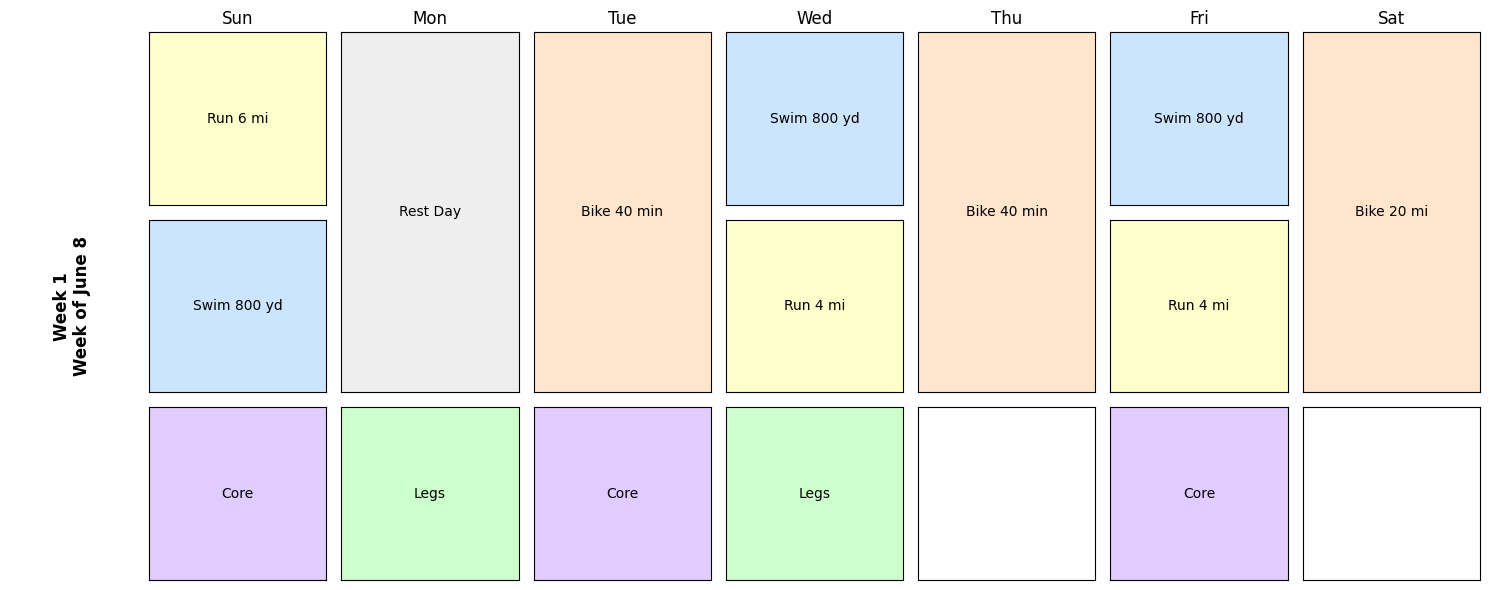

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(15, 6))
gs = GridSpec(3, 8, figure=fig, width_ratios=[0.7] + [1]*7)  # First column narrower for label

# Days of the week, starting with Sunday
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Workouts reordered to match Sunday-first week
main_workouts = [
    ['Run 6 mi', 'Swim 800 yd'],        # Sunday
    [('Rest Day', 2)],                  # Monday
    [('Bike 40 min', 2)],               # Tuesday
    ['Swim 800 yd', 'Run 4 mi'],        # Wednesday
    [('Bike 40 min', 2)],               # Thursday
    ['Swim 800 yd', 'Run 4 mi'],        # Friday
    [('Bike 20 mi', 2)],                # Saturday
]

strength_core = [
    'Core', 'Legs', 'Core', 'Legs', '', 'Core', ''  # Sunday to Saturday
]

# Color mapping function
def get_color(text):
    text = text.lower()
    if 'swim' in text:
        return '#cce5ff'
    elif 'bike' in text:
        return '#ffe5cc'
    elif 'run' in text:
        return '#ffffcc'
    elif 'rest' in text:
        return '#eeeeee'
    elif 'core' in text:
        return '#e0ccff'
    elif 'legs' in text:
        return '#ccffcc'
    else:
        return '#ffffff'

# Add vertical label (spanning all 3 rows, first column)
ax_label = fig.add_subplot(gs[:, 0])
ax_label.axis('off')
ax_label.text(0.5, 0.5, 'Week 1\nWeek of June 8', ha='center', va='center', rotation='vertical', fontsize=12, weight='bold')

# Add day titles
for i, day in enumerate(days):
    ax = fig.add_subplot(gs[0, i + 1])  # Offset by 1 because of label column
    ax.axis('off')
    ax.set_title(day)

# Add main workouts
for i, entry in enumerate(main_workouts):
    if isinstance(entry[0], tuple):  # Merged
        text, rowspan = entry[0]
        ax = fig.add_subplot(gs[0:2, i + 1])
        ax.set_facecolor(get_color(text))
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=10, wrap=True)
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_frame_on(True)
    else:
        for j in range(2):
            text = entry[j]
            ax = fig.add_subplot(gs[j, i + 1])
            ax.set_facecolor(get_color(text))
            ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=10, wrap=True)
            ax.set_xticks([]); ax.set_yticks([])
            ax.set_frame_on(True)

# Add strength/core row
for i, text in enumerate(strength_core):
    ax = fig.add_subplot(gs[2, i + 1])
    ax.set_facecolor(get_color(text))
    if text:
        ax.text(0.5, 0.5, text, ha='center', va='center', fontsize=10, wrap=True)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_frame_on(True)

plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import timedelta
import base64
from io import BytesIO

# Helper function to encode SVG to base64
def svg_to_base64(svg_code):
    b = BytesIO()
    b.write(svg_code.encode())
    return base64.b64encode(b.getvalue()).decode()

# SVG definitions as string
swim_svg = '''
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 64 64" width="64" height="64">
    <g fill="none" stroke="#000000" stroke-width="2">
        <!-- Water Waves -->
        <path d="M10,40 Q20,30 30,40 Q40,30 50,40 Q60,30 70,40" stroke-linecap="round"/>
        <path d="M10,50 Q20,40 30,50 Q40,40 50,50 Q60,40 70,50" stroke-linecap="round"/>
        <!-- Swimmer's Body -->
        <circle cx="32" cy="25" r="5" stroke="#000000" stroke-width="2" fill="#000000" />
        <line x1="32" y1="25" x2="32" y2="40" stroke="#000000" stroke-width="2" />
        <line x1="32" y1="25" x2="26" y2="20" stroke="#000000" stroke-width="2" />
        <line x1="32" y1="25" x2="38" y2="20" stroke="#000000" stroke-width="2" />
    </g>
</svg>
'''

run_svg = '''
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 64 64" width="64" height="64">
    <g fill="none" stroke="#000000" stroke-width="2">
        <!-- Legs and Feet -->
        <line x1="32" y1="48" x2="28" y2="56" stroke="#000000" stroke-width="2" />
        <line x1="32" y1="48" x2="36" y2="56" stroke="#000000" stroke-width="2" />
        <!-- Runner's Body -->
        <circle cx="32" cy="28" r="6" stroke="#000000" stroke-width="2" fill="#000000" />
        <line x1="32" y1="28" x2="32" y2="38" stroke="#000000" stroke-width="2" />
        <line x1="32" y1="38" x2="28" y2="42" stroke="#000000" stroke-width="2" />
        <line x1="32" y1="38" x2="36" y2="42" stroke="#000000" stroke-width="2" />
    </g>
</svg>
'''

bike_svg = '''
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 64 64" width="64" height="64">
    <g fill="none" stroke="#000000" stroke-width="2">
        <!-- Bicycle Wheels -->
        <circle cx="20" cy="50" r="10" stroke="#000000" stroke-width="2" />
        <circle cx="50" cy="50" r="10" stroke="#000000" stroke-width="2" />
        <!-- Bicycle Frame -->
        <line x1="20" y1="50" x2="35" y2="35" stroke="#000000" stroke-width="2" />
        <line x1="50" y1="50" x2="35" y2="35" stroke="#000000" stroke-width="2" />
        <line x1="35" y1="35" x2="35" y2="50" stroke="#000000" stroke-width="2" />
        <line x1="20" y1="50" x2="35" y2="50" stroke="#000000" stroke-width="2" />
    </g>
</svg>
'''

core_svg = '''
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 64 64" width="64" height="64">
    <g fill="none" stroke="#000000" stroke-width="2">
        <!-- Dumbbell Rod -->
        <line x1="20" y1="32" x2="44" y2="32" stroke="#000000" stroke-width="2" />
        <!-- Dumbbell Weights -->
        <circle cx="20" cy="32" r="6" stroke="#000000" stroke-width="2" />
        <circle cx="44" cy="32" r="6" stroke="#000000" stroke-width="2" />
    </g>
</svg>
'''

# Convert to base64
swim_base64 = svg_to_base64(swim_svg)
run_base64 = svg_to_base64(run_svg)
bike_base64 = svg_to_base64(bike_svg)
core_base64 = svg_to_base64(core_svg)

def plot_weekly_plan_with_icons(week_number, start_date, daily_workouts):
    """
    Plots a triathlon training schedule with icons (swim, run, bike, strength) alongside the text.
    Takes in the week number, start date, and daily workout list.
    """
    # Calculate date range
    end_date = start_date + timedelta(days=6)
    date_label = f"{start_date.strftime('%b %d')}–{end_date.strftime('%b %d')}"
    
    fig = plt.figure(figsize=(15, 7))
    gs = GridSpec(4, 8, figure=fig, height_ratios=[1, 1, 1, 0.5], width_ratios=[0.4] + [1]*7)

    days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

    # Left-side vertical label
    ax_label = fig.add_subplot(gs[:3, 0])
    ax_label.axis('off')
    ax_label.text(
        0.5, 0.5, f'Week {week_number}\n{date_label}',
        ha='center', va='center',
        rotation='vertical', fontsize=11, weight='bold'
    )

    # Day titles
    for i, day in enumerate(days):
        ax = fig.add_subplot(gs[0, i + 1])
        ax.axis('off')
        ax.set_title(day)

    # Main + strength rows
    for i, day_data in enumerate(daily_workouts):
        w1 = day_data[0] if len(day_data) > 0 else ''
        w2 = day_data[1] if len(day_data) > 1 else ''
        strength = day_data[2] if len(day_data) > 2 else ''

        # Workouts (possibly merged)
        icon1 = get_icon_base64(w1)
        icon2 = get_icon_base64(w2)

        # Workouts (possibly merged)
        if not w2 or 'rest' in w1.lower():
            ax = fig.add_subplot(gs[0:2, i + 1])
            ax.set_facecolor('#eeeeee' if 'rest' in w1.lower() else '#ffffff')
            ax.text(0.5, 0.5, w1, ha='center', va='center', fontsize=10, wrap=True)
            if icon1:
                img = mpimg.imread(BytesIO(base64.b64decode(icon1)))  # Read base64 as image
                ax.imshow(img, aspect='auto', extent=[0.3, 0.7, 0.6, 1.0])
            ax.set_xticks([]); ax.set_yticks([])
            ax.set_frame_on(True)
        else:
            for j, w in enumerate([w1, w2]):
                ax = fig.add_subplot(gs[j, i + 1])
                ax.set_facecolor('#ffffff')
                ax.text(0.5, 0.5, w, ha='center', va='center', fontsize=10, wrap=True)
                icon = icon1 if j == 0 else icon2
                if icon:
                    img = mpimg.imread(BytesIO(base64.b64decode(icon)))  # Read base64 as image
                    ax.imshow(img, aspect='auto', extent=[0.3, 0.7, 0.6, 1.0])
                ax.set_xticks([]); ax.set_yticks([])
                ax.set_frame_on(True)

        # Strength row
        ax = fig.add_subplot(gs[2, i + 1])
        ax.set_facecolor('#eeeeee' if 'rest' in strength.lower() else '#ffffff')
        if strength:
            ax.text(0.5, 0.5, strength, ha='center', va='center', fontsize=10, wrap=True)
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_frame_on(True)

    # Volume summary row
    for i, day_data in enumerate(daily_workouts):
        w1 = day_data[0] if len(day_data) > 0 else ''
        w2 = day_data[1] if len(day_data) > 1 else ''
        s1, b1, r1 = extract_volume(w1)
        s2, b2, r2 = extract_volume(w2)

        text = ''
        if s1 + s2 > 0:
            text += f"Swim {s1 + s2:.0f} yd\n"
        if b1 + b2 > 0:
            text += f"Bike {b1 + b2:.1f} mi\n"
        if r1 + r2 > 0:
            text += f"Run {r1 + r2:.1f} mi"

        ax = fig.add_subplot(gs[3, i + 1])
        ax.set_facecolor('#f9f9f9')
        ax.text(0.5, 0.5, text.strip(), ha='center', va='center', fontsize=9, wrap=True)
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_frame_on(True)

    # Bottom left (blank)
    ax_blank = fig.add_subplot(gs[3, 0])
    ax_blank.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Total volume for Week {week_number} ({date_label}):")
    print(f"  Swim: {total_swim:.0f} yd")
    print(f"  Bike: {total_bike:.1f} mi")
    print(f"  Run : {total_run:.1f} mi")

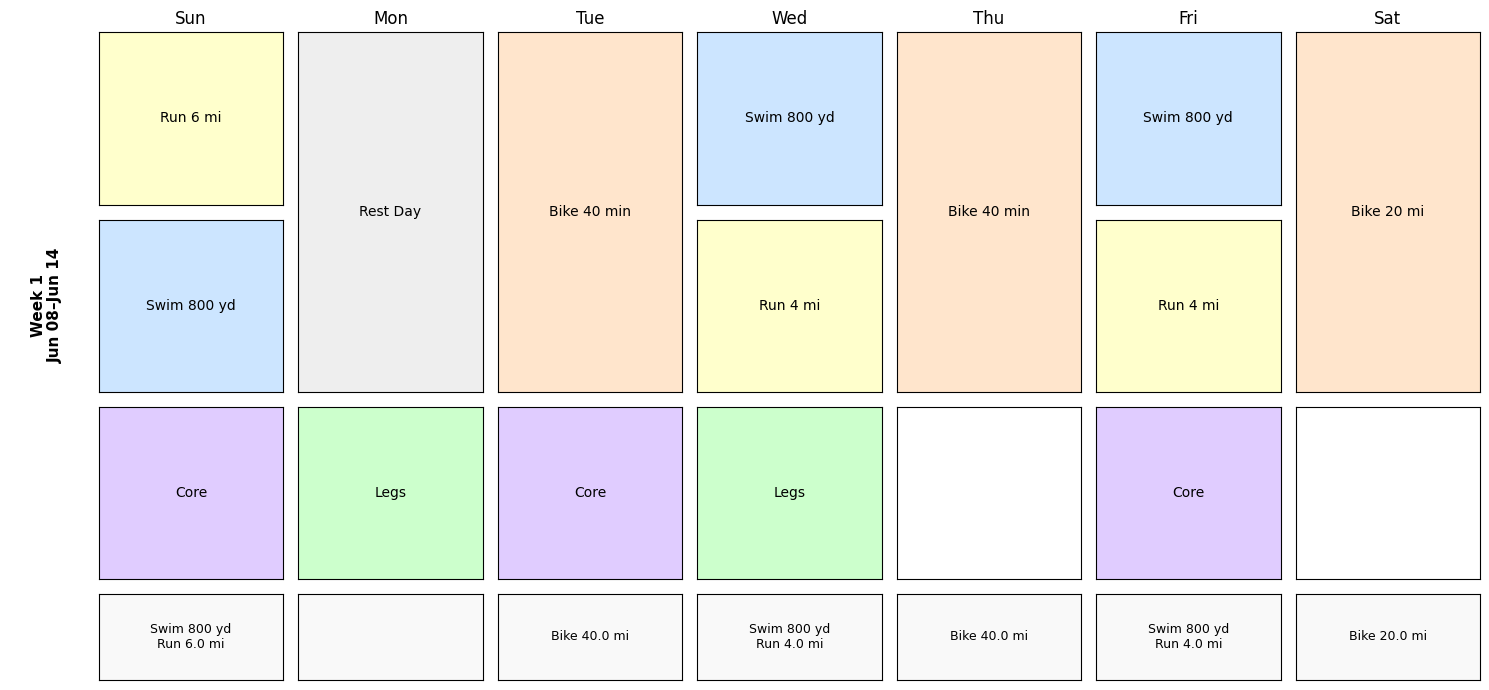

Total volume for Week 1 (Jun 08–Jun 14):
  Swim: 2400 yd
  Bike: 100.0 mi
  Run : 14.0 mi


In [14]:
import datetime

plot_weekly_plan(
    week_number=1,
    start_date=datetime.date(2025, 6, 8),  # Sunday
    daily_workouts=[
        ['Run 6 mi', 'Swim 800 yd', 'Core'],       # Sunday
        ['Rest Day', '', 'Legs'],                  # Monday
        ['Bike 40 min', '', 'Core'],               # Tuesday
        ['Swim 800 yd', 'Run 4 mi', 'Legs'],       # Wednesday
        ['Bike 40 min', '', ''],                   # Thursday
        ['Swim 800 yd', 'Run 4 mi', 'Core'],       # Friday
        ['Bike 20 mi', '', '']                     # Saturday
    ]
)


In [8]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import timedelta
import matplotlib.image as mpimg

# Pre-load your PNG icons
ICON_FILES = {
    'swim': 'icons/swim.png',
    'run':  'icons/run.png',
    'bike': 'icons/bike.png',
    'core': 'icons/cross.png',   # use for both Core & Legs
}
ICON_IMGS = {k: mpimg.imread(v) for k, v in ICON_FILES.items()}

def get_icon_image(workout):
    """Return the pre-loaded PNG array for this workout, or None."""
    w = workout.lower()
    if 'swim' in w:
        return ICON_IMGS['swim']
    if 'bike' in w:
        return ICON_IMGS['bike']
    if 'run' in w:
        return ICON_IMGS['run']
    if 'core' in w or 'legs' in w:
        return ICON_IMGS['core']
    return None

def plot_weekly_plan_with_icons(week_number, start_date, daily_workouts):
    """
    Plots a 4-row weekly triathlon plan (Sun→Sat) with PNG icons next to each workout.
      - week_number: int
      - start_date: datetime.date (Sunday of that week)
      - daily_workouts: list of 7 lists [w1, w2, strength]
    """
    # compute date range
    end_date = start_date + timedelta(days=6)
    date_label = f"{start_date.strftime('%b %d')}–{end_date.strftime('%b %d')}"

    fig = plt.figure(figsize=(15,7))
    gs = GridSpec(4, 8, figure=fig,
                  height_ratios=[1,1,1,0.5],
                  width_ratios=[0.4] + [1]*7)

    days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
    # Week label
    ax_lbl = fig.add_subplot(gs[:3,0]); ax_lbl.axis('off')
    ax_lbl.text(0.5,0.5, f'Week {week_number}\n{date_label}',
                ha='center', va='center',
                rotation='vertical', fontsize=11, weight='bold')

    # Day headers
    for i,d in enumerate(days):
        ax = fig.add_subplot(gs[0, i+1]); ax.axis('off'); ax.set_title(d)

    def extract_volume(txt):
        t=txt.lower(); s=b=r=0
        if 'swim' in t and 'yd' in t:
            for p in t.split():
                if p.isdigit(): s+=int(p); break
        if 'bike' in t and 'mi' in t:
            for p in t.split():
                try: b+=float(p); break
                except: pass
        if 'run' in t and 'mi' in t:
            for p in t.split():
                try: r+=float(p); break
                except: pass
        return s,b,r

    tot_s=tot_b=tot_r=0

    # Rows 1–3
    for col, day in enumerate(daily_workouts, start=1):
        w1, w2, strength = (day + ['',''])[:3]
        s1,b1,r1 = extract_volume(w1)
        s2,b2,r2 = extract_volume(w2)
        tot_s += s1+s2; tot_b += b1+b2; tot_r += r1+r2

        merged = (not w2) or ('rest' in w1.lower())

        # workout rows
        if merged:
            ax = fig.add_subplot(gs[0:2, col])
            ax.set_facecolor('#eeeeee' if 'rest' in w1.lower() else '#ffffff')
            ax.text(0.5,0.5, w1, ha='center', va='center', fontsize=10, wrap=True)
            img = get_icon_image(w1)
            if img is not None:
                ax.imshow(img, aspect='auto', extent=[0.3,0.7,0.6,1.0])
        else:
            for row, w in enumerate([w1, w2]):
                ax = fig.add_subplot(gs[row, col])
                ax.set_facecolor('#ffffff')
                ax.text(0.5,0.5, w, ha='center', va='center', fontsize=10, wrap=True)
                img = get_icon_image(w)
                if img is not None:
                    ax.imshow(img, aspect='auto', extent=[0.3,0.7,0.6,1.0])

        # strength/core row
        ax = fig.add_subplot(gs[2, col])
        ax.set_facecolor('#ffffff')
        if strength:
            ax.text(0.5,0.5, strength, ha='center', va='center', fontsize=10, wrap=True)
            img = get_icon_image(strength)
            if img is not None:
                ax.imshow(img, aspect='auto', extent=[0.3,0.7,0.6,1.0])

        ax.set_xticks([]); ax.set_yticks([]); ax.set_frame_on(True)

    # Volume summary row
    for col, day in enumerate(daily_workouts, start=1):
        w1, w2 = (day + [''])[:2]
        s1,b1,r1 = extract_volume(w1); s2,b2,r2 = extract_volume(w2)
        parts = []
        if s1+s2>0: parts.append(f"Swim {s1+s2:.0f} yd")
        if b1+b2>0: parts.append(f"Bike {b1+b2:.1f} mi")
        if r1+r2>0: parts.append(f"Run {r1+r2:.1f} mi")
        ax = fig.add_subplot(gs[3, col])
        ax.set_facecolor('#f9f9f9')
        ax.text(0.5,0.5, "\n".join(parts), ha='center', va='center', fontsize=9, wrap=True)
        ax.set_xticks([]); ax.set_yticks([]); ax.set_frame_on(True)

    # Hide bottom-left
    fig.add_subplot(gs[3,0]).axis('off')

    plt.tight_layout()
    plt.show()

    print(f"Total volume for Week {week_number} ({date_label}):")
    print(f"  Swim: {tot_s:.0f} yd")
    print(f"  Bike: {tot_b:.1f} mi")
    print(f"  Run : {tot_r:.1f} mi")


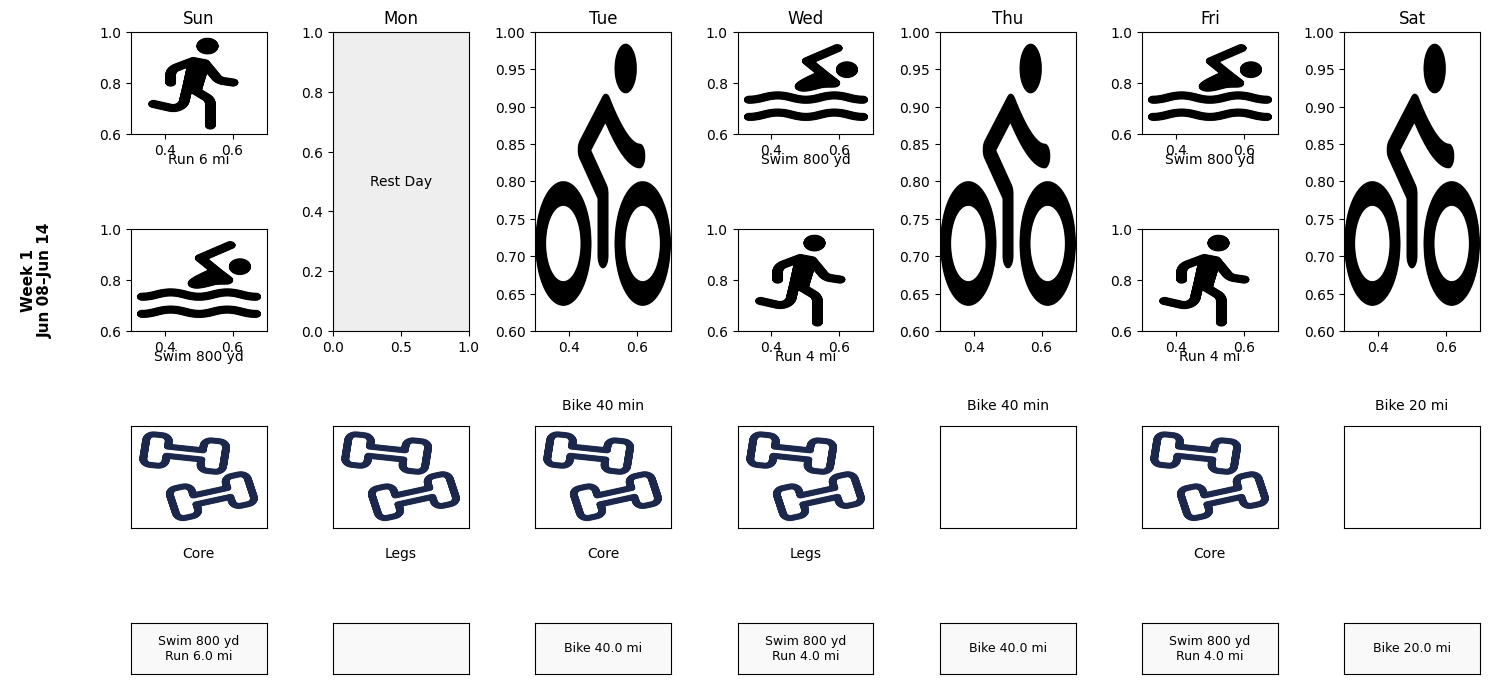

Total volume for Week 1 (Jun 08–Jun 14):
  Swim: 2400 yd
  Bike: 100.0 mi
  Run : 14.0 mi


In [9]:
import datetime

plot_weekly_plan_with_icons(
    week_number=1,
    start_date=datetime.date(2025, 6, 8),  # Sunday
    daily_workouts=[
        ['Run 6 mi', 'Swim 800 yd', 'Core'],       # Sunday
        ['Rest Day', '', 'Legs'],                  # Monday
        ['Bike 40 min', '', 'Core'],               # Tuesday
        ['Swim 800 yd', 'Run 4 mi', 'Legs'],       # Wednesday
        ['Bike 40 min', '', ''],                   # Thursday
        ['Swim 800 yd', 'Run 4 mi', 'Core'],       # Friday
        ['Bike 20 mi', '', '']                     # Saturday
    ]
)
